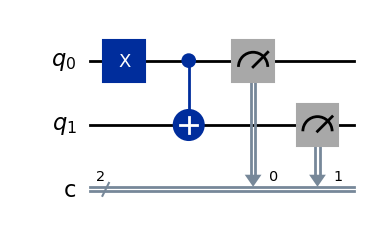

In [17]:
import qiskit as q

circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits, currently: 0, 0
circuit.x(0) # applying not gate to qubit index 0, currently: 1, 0
circuit.cx(0, 1) # cnot, controlled not. Filips 2nd qubit value if first qubit is a 1, currently: 1, 1

circuit.measure([0, 1], [0, 1])
circuit.draw("mpl")

In [18]:
token = open("token.key", "r").read()

In [19]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider(token=token)

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    
    print(f"{backend.name} has {backend.status().pending_jobs} queued and {qubit_count} qubits.")

ibmq_qasm_simulator has 0 queued and simulated qubits.
simulator_extended_stabilizer has 0 queued and simulated qubits.
simulator_mps has 0 queued and simulated qubits.
simulator_statevector has 0 queued and simulated qubits.
simulator_stabilizer has 0 queued and simulated qubits.
ibm_brisbane has 129 queued and 127 qubits.
ibm_kyoto has 53 queued and 127 qubits.
ibm_osaka has 17 queued and 127 qubits.


In [20]:
from qiskit_ibm_provider.job import job_monitor

backend = provider.get_backend("ibm_osaka")
job = backend.run(circuit, shots=500)
job_monitor(job)

Job Status: ERROR - Instruction cx is not supported          


In [25]:
import qiskit as q

circuit = q.QuantumCircuit(2,2)  # 2 qbits, 2 classical bits.
circuit.h(0) # Hadamard gate, puts qubit 0 into superposition
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [26]:
from qiskit_aer import AerProvider

provider = AerProvider()
sim_backend = provider.get_backend("qasm_simulator")

In [27]:
from qiskit_ibm_provider.job import job_monitor

job = sim_backend.run(circuit, shots=500)
job_monitor(job)

Job Status: job has successfully run


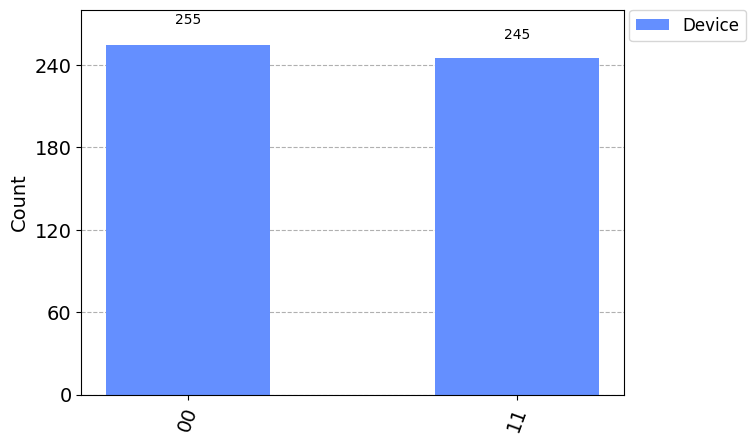

In [28]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=["Device"])
